In [167]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [168]:
df = read_csv("C:\\Users\\HP\\Downloads\\assignment 13\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [169]:
dataframe = df.drop(["animal name"], axis=1)

In [170]:
dataframe.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [171]:
dataframe[dataframe.duplicated()].shape

(42, 17)

In [172]:
data=dataframe.drop_duplicates()

In [173]:
array = data.values
array.shape

(59, 17)

In [46]:
X = array[:, 0:16]
Y = array[:, 16]


In [47]:
num_folds = 10
kfold = KFold(n_splits=10)

In [60]:
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, X, Y, cv=kfold)

In [61]:
print(results.mean())

0.76


### Grid Search for Algorithm Tuning

In [217]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [237]:

data = read_csv("C:\\Users\\HP\\Downloads\\assignment 13\\Zoo.csv")
df = data.drop(["animal name"], axis=1)



In [238]:
array = df.values
X = array[:, 0:16]
Y = array[:, 16]

In [247]:
n_neighbors = numpy.array(range(10,40,2))
param_grid = dict(n_neighbors=n_neighbors)

In [248]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])})

In [249]:
print(grid.best_score_)
print(grid.best_params_)

0.781904761904762
{'n_neighbors': 18}


### Visualizing the CV results

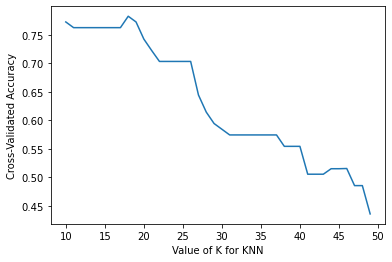

In [252]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(10,50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
#As per the plotting of graph we can estimate that the optimal value for KNN is 18